In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
dataset = pd.read_csv('admitance.csv')

In [3]:
dataset

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [12]:
dataset['SAT']

0      1363
1      1792
2      1954
3      1653
4      1593
       ... 
163    1722
164    1750
165    1555
166    1524
167    1461
Name: SAT, Length: 168, dtype: int64

In [5]:
X

0      1363
1      1792
2      1954
3      1653
4      1593
       ... 
163    1722
164    1750
165    1555
166    1524
167    1461
Name: SAT, Length: 168, dtype: int64

In [9]:
dataset['Admitted'] = dataset['Admitted'].map({'Yes':1,'No':0})

In [11]:
dataset['Admitted']

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    1
165    0
166    0
167    0
Name: Admitted, Length: 168, dtype: int64

In [13]:
dataset

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


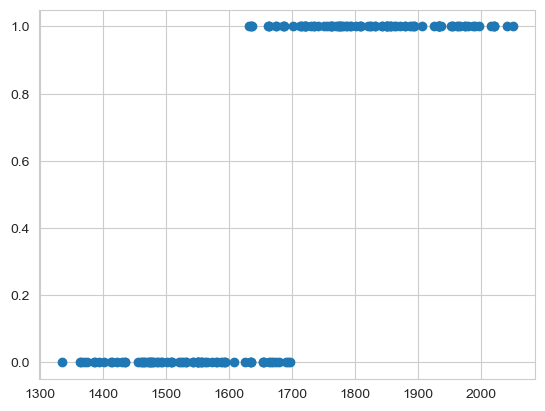

In [15]:
plt.scatter(dataset['SAT'], dataset['Admitted'])
plt.show()

C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_16104\1069561897.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['SAT'])


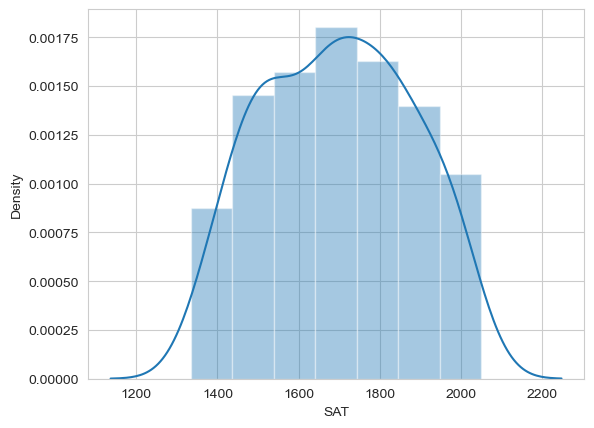

In [18]:
sns.distplot(dataset['SAT'])
plt.show()

C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_16104\1609050617.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Admitted'])


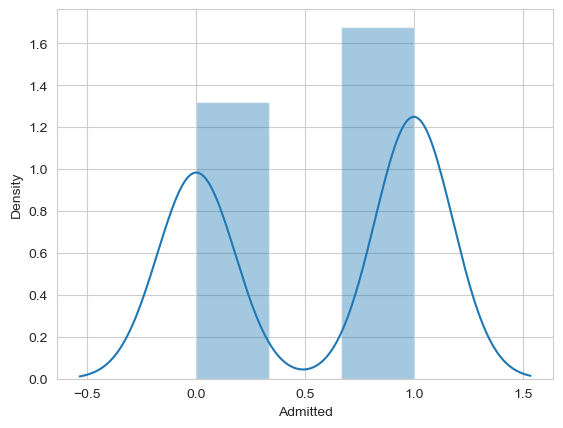

In [20]:
sns.distplot(dataset['Admitted'])
plt.show()

In [21]:
# From the above, we can see that it is not a Linear Regression but a Classification, so we will use 'Logistic Regression'

In [22]:
x = dataset['SAT']

In [23]:
x

0      1363
1      1792
2      1954
3      1653
4      1593
       ... 
163    1722
164    1750
165    1555
166    1524
167    1461
Name: SAT, Length: 168, dtype: int64

In [24]:
y = dataset['Admitted']

In [25]:
y

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    1
165    0
166    0
167    0
Name: Admitted, Length: 168, dtype: int64

In [26]:
import statsmodels.api as sm

In [27]:
x1 = sm.add_constant(x)

In [28]:
x1

,const,SAT
0,1.0,1363
1,1.0,1792
2,1.0,1954
3,1.0,1653
4,1.0,1593
...,...,...
163,1.0,1722
164,1.0,1750
165,1.0,1555
166,1.0,1524


In [29]:
model = sm.Logit(y,x1).fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 11 Jan 2024   Pseudo R-squ.:                  0.7992
Time:                        16:08:22   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [32]:
def f(b0, b1, x):
    return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

In [33]:
f(-69.9128,0.0420, 1850 )

array(0.99958516)

In [34]:
p_sorted = np.sort(f(-69.9128,0.0420,x))

In [35]:
p_sorted

array([9.33055705e-07, 3.15411328e-06, 3.28940688e-06, 4.23213387e-06,
       5.00634221e-06, 7.94626981e-06, 8.64258662e-06, 1.11194902e-05,
       1.62272890e-05, 2.46971008e-05, 2.68612223e-05, 3.75875534e-05,
       5.25969409e-05, 6.48868945e-05, 6.48868945e-05, 1.50289023e-04,
       1.85401759e-04, 1.93352933e-04, 2.19311090e-04, 2.19311090e-04,
       2.70545415e-04, 3.20022237e-04, 3.48055671e-04, 3.48055671e-04,
       3.78543859e-04, 3.94774891e-04, 4.47762382e-04, 5.52336835e-04,
       5.76015389e-04, 7.10521909e-04, 7.72736046e-04, 1.08098613e-03,
       1.39036173e-03, 1.39036173e-03, 1.51201337e-03, 2.39780706e-03,
       2.71891434e-03, 2.95646540e-03, 3.64480845e-03, 3.80055642e-03,
       5.77284890e-03, 6.01898181e-03, 7.73066262e-03, 8.05959278e-03,
       8.05959278e-03, 8.05959278e-03, 9.92425195e-03, 9.92425195e-03,
       1.07845244e-02, 1.27322894e-02, 1.50264915e-02, 2.00592837e-02,
       2.67319514e-02, 2.78466740e-02, 3.70119560e-02, 4.34883451e-02,
      

In [36]:
p_sorted.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.002,
       0.003, 0.003, 0.004, 0.004, 0.006, 0.006, 0.008, 0.008, 0.008,
       0.008, 0.01 , 0.01 , 0.011, 0.013, 0.015, 0.02 , 0.027, 0.028,
       0.037, 0.043, 0.047, 0.047, 0.082, 0.159, 0.196, 0.21 , 0.217,
       0.217, 0.217, 0.217, 0.231, 0.381, 0.391, 0.411, 0.473, 0.483,
       0.494, 0.494, 0.515, 0.557, 0.598, 0.598, 0.608, 0.647, 0.702,
       0.719, 0.719, 0.744, 0.767, 0.796, 0.828, 0.88 , 0.888, 0.893,
       0.911, 0.911, 0.914, 0.918, 0.94 , 0.951, 0.951, 0.961, 0.973,
       0.978, 0.982, 0.983, 0.985, 0.985, 0.988, 0.99 , 0.99 , 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.994, 0.995, 0.996, 0.997, 0.998,
       0.998, 0.998, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       1.   , 1.   ,

In [37]:
x_sorted = np.sort(x)

In [38]:
x_sorted

array([1334, 1363, 1364, 1370, 1374, 1385, 1387, 1393, 1402, 1412, 1414,
       1422, 1430, 1435, 1435, 1455, 1460, 1461, 1464, 1464, 1469, 1473,
       1475, 1475, 1477, 1478, 1481, 1486, 1487, 1492, 1494, 1502, 1508,
       1508, 1510, 1521, 1524, 1526, 1531, 1532, 1542, 1543, 1549, 1550,
       1550, 1550, 1555, 1555, 1557, 1561, 1565, 1572, 1579, 1580, 1587,
       1591, 1593, 1593, 1607, 1625, 1631, 1633, 1634, 1634, 1634, 1634,
       1636, 1653, 1654, 1656, 1662, 1663, 1664, 1664, 1666, 1670, 1674,
       1674, 1675, 1679, 1685, 1687, 1687, 1690, 1693, 1697, 1702, 1712,
       1714, 1715, 1720, 1720, 1721, 1722, 1730, 1735, 1735, 1741, 1750,
       1755, 1760, 1761, 1764, 1764, 1769, 1773, 1775, 1775, 1777, 1778,
       1781, 1786, 1787, 1792, 1794, 1802, 1808, 1808, 1810, 1821, 1824,
       1826, 1831, 1832, 1842, 1843, 1849, 1850, 1850, 1850, 1855, 1855,
       1857, 1861, 1865, 1872, 1879, 1880, 1887, 1891, 1893, 1893, 1907,
       1925, 1931, 1933, 1934, 1934, 1934, 1936, 19

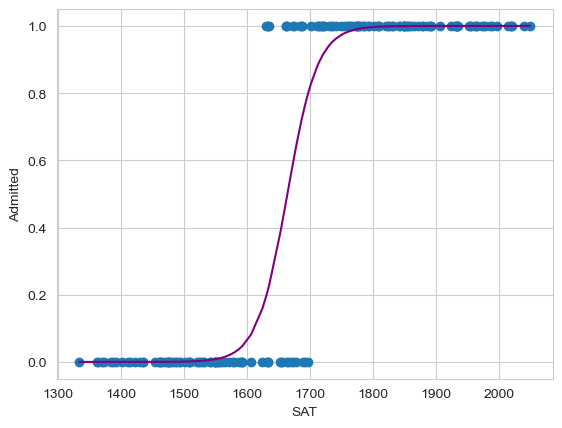

In [42]:
plt.scatter(dataset['SAT'], dataset['Admitted'])
plt.plot(x_sorted,p_sorted,color = 'purple')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()